In [ ]:
# ChEMBL webresource client examples

The library helps accessing ChEMBL data and cheminformatics tools from Python. You don't need to know how to write SQL. You don't need to know how to interact with REST APIs. You don't need to compile or install any cheminformatics frameworks. Results are cached.

The client handles interaction with the HTTPS protocol and caches all results in the local file system for faster retrieval. Abstracting away all network-related tasks, the client provides the end user with a convenient interface, giving the impression of working with a local resource. Design is based on the Django QuerySet interface. The client also implements lazy evaluation of results, which means it will only evaluate a request for data when a value is required. This approach reduces number of network requests and increases performance.

## Available data entities

You can list available data entities using the following code

In [1]:
from chembl_webresource_client.new_client import new_client

available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_class', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


## Available filters

The design of the client is based on Django QuerySet (https://docs.djangoproject.com/en/1.11/ref/models/querysets) and most important lookup types are supported. These are:

- exact
- iexact
- contains
- icontains
- in
- gt
- gte
- lt
- lte
- startswith
- istartswith
- endswith
- iendswith
- range
- isnull
- regex
- iregex

## Only operator

`only` is a special method allowing to limit the results to a selected set of fields. only should take a single argument: a list of fields that should be included in result. Specified fields have to exists in the endpoint against which only is executed. Using only will usually make an API call faster because less information returned will save bandwidth. The API logic will also check if any SQL joins are necessary to return the specified field and exclude unnecessary joins with critically improves performance.

Please note that only has one limitation: a list of fields will ignore nested fields i.e. calling only(['molecule_properties__alogp']) is equivalent to only(['molecule_properties']).

For many 2 many relationships only will not make any SQL join optimisation.

# Molecules

Molecule records may be retrieved in a number of ways, such as lookup of single molecules using various identifiers or searching for compounds via similarity.

## Find a molecule by pref_name


In [2]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(pref_name__iexact='aspirin')
mols

[{'atc_classifications': ['B01AC06', 'N02BA01', 'N02BA51', 'A01AD05', 'N02BA71'], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 15365, 'chirality': 2, 'cross_references': [{'xref_id': 'aspirin', 'xref_name': 'aspirin', 'xref_src': 'DailyMed'}, {'xref_id': '144203627', 'xref_name': 'SID: 144203627', 'xref_src': 'PubChem'}, {'xref_id': '144209315', 'xref_name': 'SID: 144209315', 'xref_src': 'PubChem'}, {'xref_id': '144210466', 'xref_name': 'SID: 144210466', 'xref_src': 'PubChem'}, {'xref_id': '170465039', 'xref_name': 'SID: 170465039', 'xref_src': 'PubChem'}, {'xref_id': '17389202', 'xref_name': 'SID: 17389202', 'xref_src': 'PubChem'}, {'xref_id': '17390036', 'xref_name': 'SID: 17390036', 'xref_src': 'PubChem'}, {'xref_id': '174007205', 'xref_name': 'SID: 174007205', 'xref_src': 'PubChem'}, {'xref_id': '26747283', 'xref_name': 'SID: 26747283', 'xref_src': 'PubChem'}, {'xref_id': '26752858', 'xref_name': 'SID: 26752858', 'xref_src': 'PubChem'}, {'

## Find a molecule by its synonyms

- in case it is not found by pref_name
- Use the `only` method where you can specify fields you want to be included in response

In [3]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra').only('molecule_chembl_id')
mols

[{'molecule_chembl_id': 'CHEMBL192'}, {'molecule_chembl_id': 'CHEMBL1737'}]

## Get a single molecule by ChEMBL id

All the main entities in the ChEMBL database have a ChEMBL ID. It is a stable identifier designed for straightforward lookup of data.

In [4]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
m1 = molecule.filter(chembl_id='CHEMBL192').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
m1

[{'molecule_chembl_id': 'CHEMBL192', 'molecule_structures': {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 'molfile': '\n     RDKit          2D\n\n 33 36  0  0  0  0  0  0  0  0999 V2000\n    2.1000   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1000    0.7000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5375   -0.0042    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917   -0.3667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042    0.9083    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917    1.0625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792    0.6833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2042    0.3458    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2875   -0.3750    0.0000 C   0  0  0  0  0  0  0  0  0  

## Get many molecules by id

In [5]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL192', 'CHEMBL27']).only(['molecule_chembl_id', 'pref_name'])
mols

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}, {'molecule_chembl_id': 'CHEMBL27', 'pref_name': 'PROPRANOLOL'}, {'molecule_chembl_id': 'CHEMBL192', 'pref_name': 'SILDENAFIL'}]

## Display a molecule image

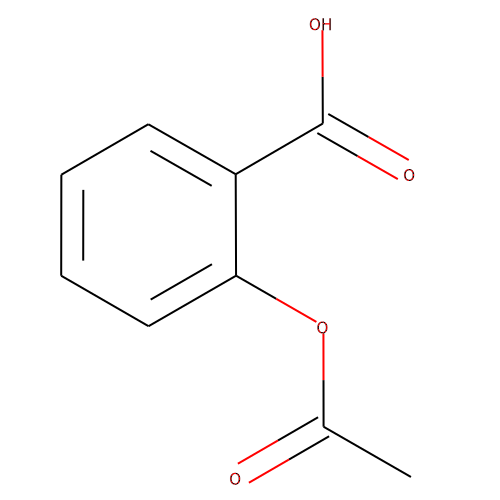

In [6]:
from chembl_webresource_client.new_client import new_client
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL25'))

## Get a single molecule by standard inchi key

In [7]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mol = molecule.filter(molecule_structures__standard_inchi_key='BSYNRYMUTXBXSQ-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol

[{'molecule_chembl_id': 'CHEMBL25', 'molecule_structures': {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O', 'molfile': '\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n    8.8810   -2.1206    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    8.8798   -2.9479    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.5946   -3.3607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.3110   -2.9474    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.3081   -2.1170    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.5928   -1.7078    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.0210   -1.7018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.7369   -2.1116    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   11.0260   -3.3588    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   11.0273   -4.1837    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.7423   -4.5949    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.3136   -4.5972    0.0000 O 

## Find compounds similar to given SMILES query with similarity threshold of 70%

In [8]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(smiles="CO[C@@H](CCC#C\C=C/CCCC(C)CCCCC=C)C(=O)[O-]", similarity=70).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL477888', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL477889', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL478779', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL2304268', 'similarity': '70.1754391193389892578125'}


## Find compounds similar to aspirin (CHEMBL25) with similarity threshold of 70%


In [9]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res

[{'molecule_chembl_id': 'CHEMBL2296002', 'pref_name': None, 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL1697753', 'pref_name': 'ASPIRIN DL-LYSINE', 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL3833325', 'pref_name': 'CARBASPIRIN CALCIUM', 'similarity': '88.8888895511627197265625'}, {'molecule_chembl_id': 'CHEMBL3833404', 'pref_name': 'CARBASPIRIN', 'similarity': '88.8888895511627197265625'}, '...(remaining elements truncated)...']

## Find compounds with the same connectivity

In [10]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
res = molecule.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL1431', 'pref_name': 'METFORMIN'}
{'molecule_chembl_id': 'CHEMBL1703', 'pref_name': 'METFORMIN HYDROCHLORIDE'}
{'molecule_chembl_id': 'CHEMBL3094198', 'pref_name': None}


## Get all approved drugs

using `order_by` to sort them by molecular weight

In [11]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4).order_by('molecule_properties__mw_freebase')
approved_drugs

[{'atc_classifications': ['V03AN03'], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 30217, 'chirality': 2, 'cross_references': [], 'dosed_ingredient': True, 'first_approval': 2015, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Gases, Diluent for', 'inorganic_flag': 1, 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL1796997', 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL1796997', 'parent_chembl_id': 'CHEMBL1796997'}, 'molecule_properties': {'alogp': None, 'aromatic_rings': None, 'cx_logd': None, 'cx_logp': None, 'cx_most_apka': None, 'cx_most_bpka': None, 'full_molformula': 'He', 'full_mwt': '4.00', 'hba': None, 'hba_lipinski': None, 'hbd': None, 'hbd_lipinski': None, 'heavy_atoms': None, 'molecular_species': None, 'mw_freebase': '4.00', 'mw_monoisotopic': '4.0026', 'num_lipinski_ro5_violations': None, 'num_ro5_violations': None, 'psa': None, 'qed_weighted': None, 'ro3_pass': None, 'rtb': None}, 'molecule_structures': {'ca

## Get approved drugs for lung cancer

In [12]:
from chembl_webresource_client.new_client import new_client

drug_indication = new_client.drug_indication
molecules = new_client.molecule

lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")
lung_cancer_mols = molecules.filter(
    molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind])

len(lung_cancer_mols)

631

## Filter drugs by approval year and name

In [13]:
from chembl_webresource_client.new_client import new_client

drug = new_client.drug
res = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin")
res

[{'applicants': ['Hikma Pharmaceuticals International Ltd', 'Jubilant Cadista Pharmaceuticals Inc', 'Apnar Pharma Lp', 'Abbott Laboratories Pharmaceutical Products Div', 'Ranbaxy Laboratories Ltd', 'Beximco Pharmaceuticals Usa Inc', 'Ivax Pharmaceuticals Inc Sub Teva Pharmaceuticals Usa', 'Mylan Technologies Inc', 'Teva Pharmaceuticals Usa Inc', 'Sandoz Inc'], 'atc_classification': [{'code': 'G04CA03', 'description': 'GENITO URINARY SYSTEM AND SEX HORMONES: UROLOGICALS: DRUGS USED IN BENIGN PROSTATIC HYPERTROPHY: Alpha-adrenoreceptor antagonists'}], 'availability_type': 1, 'biotherapeutic': None, 'black_box': False, 'black_box_warning': '0', 'chirality': 0, 'development_phase': 4, 'drug_type': 1, 'first_approval': 1987, 'first_in_class': False, 'helm_notation': None, 'indication_class': 'Antihypertensive', 'molecule_chembl_id': 'CHEMBL611', 'molecule_properties': {'alogp': '1.06', 'aromatic_rings': 2, 'cx_logd': '0.95', 'cx_logp': '1.18', 'cx_most_apka': None, 'cx_most_bpka': '7.24', '

## Get all biotherapeutic molecules

In [14]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)
len(biotherapeutics)

22963

## Get molecules with molecular weight <= 300

In [15]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

len(light_molecules)

367682

## Get molecules with molecular weight <= 300 AND pref_name ending with nib

In [16]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_nib_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300, pref_name__iendswith="nib").only(['molecule_chembl_id', 'pref_name'])

light_nib_molecules

[{'molecule_chembl_id': 'CHEMBL276711', 'pref_name': 'SEMAXANIB'}, {'molecule_chembl_id': 'CHEMBL4594348', 'pref_name': 'ELSUBRUTINIB'}]

## Get all molecules in ChEMBL with no Rule-of-Five violations

In [17]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
no_violations = molecule.filter(molecule_properties__num_ro5_violations=0)
len(no_violations)

1441706

# Activities

## Get all IC50 activities related to the hERG target

In [18]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
activity = new_client.activity
herg = target.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")

len(herg_activities)

13200

## Get all activities for a specific target with assay type B (binding):

In [19]:
from chembl_webresource_client.new_client import new_client

activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL3938', assay_type='B')

len(res)

860

## Get all activities with a pChEMBL value for a molecule

In [20]:
from chembl_webresource_client.new_client import new_client

activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25", pchembl_value__isnull=False)

len(res)

138

## Search for ADMET-related inhibitor assays (type A)

In [21]:
from chembl_webresource_client.new_client import new_client
assay = new_client.assay
res = assay.filter(description__icontains='inhibit', assay_type='A')
res

[{'assay_category': None, 'assay_cell_type': None, 'assay_chembl_id': 'CHEMBL884521', 'assay_classifications': [], 'assay_organism': 'Rattus norvegicus', 'assay_parameters': [], 'assay_strain': None, 'assay_subcellular_fraction': None, 'assay_tax_id': 10116, 'assay_test_type': None, 'assay_tissue': None, 'assay_type': 'A', 'assay_type_description': 'ADME', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'cell_chembl_id': None, 'confidence_description': 'Direct single protein target assigned', 'confidence_score': 9, 'description': 'Inhibition of cytochrome P450 progesterone 15-alpha hydroxylase', 'document_chembl_id': 'CHEMBL1125500', 'relationship_description': 'Direct protein target assigned', 'relationship_type': 'D', 'src_assay_id': None, 'src_id': 1, 'target_chembl_id': 'CHEMBL3705', 'tissue_chembl_id': None, 'variant_sequence': None}, {'assay_category': None, 'assay_cell_type': None, 'assay_chembl_id': 'CHEMBL615148', 'assay_classifications': [], 'assay_organism

# Tissues

## Get tissue by BTO ID

In [22]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(bto_id="BTO:0001073")
res

[{'bto_id': 'BTO:0001073', 'caloha_id': 'TS-0798', 'efo_id': 'EFO:0000857', 'pref_name': 'Pituitary gland', 'tissue_chembl_id': 'CHEMBL3638173', 'uberon_id': 'UBERON:0000007'}]

## Get tissue by Caloha id

In [23]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(caloha_id="TS-0490")
res

[{'bto_id': 'BTO:0000648', 'caloha_id': 'TS-0490', 'efo_id': 'EFO:0000834', 'pref_name': 'Intestine', 'tissue_chembl_id': 'CHEMBL3638176', 'uberon_id': 'UBERON:0000160'}]

## Get tissue by Uberon id

In [24]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(uberon_id="UBERON:0000173")
res

[{'bto_id': 'BTO:0000068', 'caloha_id': 'TS-0034', 'efo_id': None, 'pref_name': 'Amniotic fluid', 'tissue_chembl_id': 'CHEMBL3638177', 'uberon_id': 'UBERON:0000173'}]

## Get tissue by name

In [25]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(pref_name__istartswith='blood')
res

[{'bto_id': None, 'caloha_id': None, 'efo_id': None, 'pref_name': 'Blood brain barrier', 'tissue_chembl_id': 'CHEMBL3987461', 'uberon_id': 'UBERON:0000120'}, {'bto_id': 'BTO:0000089', 'caloha_id': 'TS-0079', 'efo_id': 'EFO:0000296', 'pref_name': 'Blood', 'tissue_chembl_id': 'CHEMBL3638178', 'uberon_id': 'UBERON:0000178'}, {'bto_id': 'BTO:0001102', 'caloha_id': 'TS-0080', 'efo_id': 'EFO:0000817', 'pref_name': 'Blood vessel', 'tissue_chembl_id': 'CHEMBL3987656', 'uberon_id': 'UBERON:0001981'}, {'bto_id': 'BTO:0000102', 'caloha_id': None, 'efo_id': None, 'pref_name': 'Blood clot', 'tissue_chembl_id': 'CHEMBL3987655', 'uberon_id': 'UBERON:0010210'}, '...(remaining elements truncated)...']

# Cells

## Get cell line by cellosaurus id

In [26]:
from chembl_webresource_client.new_client import new_client

cell_line = new_client.cell_line
res = cell_line.filter(cellosaurus_id="CVCL_0417")
res

[{'cell_chembl_id': 'CHEMBL3307686', 'cell_description': 'MDA-MB-435 (Breast metastasis of melanoma cells', 'cell_id': 687, 'cell_name': 'MDA-MB-435', 'cell_source_organism': 'Homo sapiens', 'cell_source_tax_id': 9606, 'cell_source_tissue': 'Breast metastasis of melanoma cells', 'cellosaurus_id': 'CVCL_0417', 'cl_lincs_id': None, 'clo_id': None, 'efo_id': 'EFO_0001213'}]

# Targets

## Find a target by gene name

In [27]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
gene_name = 'BRD4'
res = target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'organism': 'Homo sapiens', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Mus musculus', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Homo sapiens', 'pref_name': 'BRD4/HDAC1', 'target_type': 'PROTEIN COMPLEX'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Cullin-4A/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppressor/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/DNA damage-binding protein 1/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppress

# References

## Find all PubMed IDs from a list that exist in the ChEMBL database.

In [15]:
from chembl_webresource_client.new_client import new_client
ids = (27502541, 27584694, 27977190, 81377812)
pubmed_IDs = new_client.document
pm = pubmed_IDs.filter(pubmed_id__in=ids).only('pubmed_id')
pm

[{'pubmed_id': 27502541}, {'pubmed_id': 27584694}, {'pubmed_id': 27977190}]

## Find all Datasets that were produced after 2021

In [16]:
datasets = new_client.document
ds = datasets.filter(year__gte=2021, doc_type = 'DATASET')
ds

[{'abstract': '', 'authors': 'University of Dundee', 'doc_type': 'DATASET', 'document_chembl_id': 'CHEMBL3988442', 'doi': '10.6019/CHEMBL3988442', 'doi_chembl': None, 'first_page': None, 'issue': None, 'journal': None, 'journal_full_title': None, 'last_page': None, 'patent_id': None, 'pubmed_id': None, 'src_id': 33, 'title': 'University of Dundee, Small-Polar-MMV Screening Library', 'volume': None, 'year': 2021}, {'abstract': 'SGC Frankfurt donated chemical probe project: A-079 was donated by Abbvie. Website: https://www.sgc-ffm.uni-frankfurt.de/#!specificprobeoverview/A-079. Control: A-226. References: 1. Bianchi, Bruce R, Xu-Feng Zhang, Regina M Reilly, Philip R Kym, Betty B Yao, and Jun Chen. 2012. ‘Species Comparison and Pharmacological Characterization of Human, Monkey, Rat, and Mouse TRPA1 Channels’. The Journal of Pharmacology and Experimental Therapeutics 341(2):360–68. PMID: 22319196. 2. Chen, Jun, Shailen K Joshi, Stanley DiDomenico, Richard J Perner, Joe P Mikusa, Donna M Ga

# Sources

## Get the table of ChEMBL sources

In [17]:
sources = new_client.source
sources

[{'src_description': 'Undefined', 'src_id': 0, 'src_short_name': 'UNDEFINED'}, {'src_description': 'Scientific Literature', 'src_id': 1, 'src_short_name': 'LITERATURE'}, {'src_description': 'GSK Malaria Screening', 'src_id': 2, 'src_short_name': 'GSK_TCMDC'}, {'src_description': 'Novartis Malaria Screening', 'src_id': 3, 'src_short_name': 'NOVARTIS'}, '...(remaining elements truncated)...']

# Utils

## Convert SMILES to CTAB

In [28]:
from chembl_webresource_client.utils import utils

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
aspirin

'\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   -0.9550   -1.3220    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.9528   -0.3220    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0858    0.1764    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7792   -0.3254    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7772   -1.3254    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6422   -1.8270    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5092   -1.3288    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5112   -0.3288    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6462    0.1728    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6482    1.1728    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7832    1.6746    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5152    1.6710    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8178    0.1798    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2 

## Compute Maximal Common Substructure

In [29]:
from chembl_webresource_client.utils import utils

smiles = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C",
          "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]
mols = [utils.smiles2ctab(smile) for smile in smiles]
sdf = ''.join(mols)
result = utils.mcs(sdf)
result

'[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]'

## Compute various molecular descriptors

In [30]:
from chembl_webresource_client.utils import utils
import json

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
descs = json.loads(utils.chemblDescriptors(aspirin))[0]
descs

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}

## Compute structural alerts

In [31]:
from chembl_webresource_client.utils import utils

mol = utils.smiles2ctab("O=C(Oc1ccccc1C(=O)O)C")
alerts = json.loads(utils.structuralAlerts(mol))
for a in alerts[0]:
    print(a)

{'alert_id': 1030, 'alert_name': 'Ester', 'set_name': 'MLSMR', 'smarts': '[#6]-C(=O)O-[#6]'}
{'alert_id': 1069, 'alert_name': 'vinyl michael acceptor1', 'set_name': 'MLSMR', 'smarts': '[#6]-[CH1]=C-C(=O)[#6,#7,#8]'}


## Standardize a molecule

In [32]:
from chembl_webresource_client.utils import utils
mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O")
st = json.loads(utils.standardize(mol))
st

[{'standard_molblock': '\n     RDKit          2D\n\n 19 17  0  0  0  0  0  0  0  0999 V2000\n    0.0000   -3.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -5.5170   -1.9538    0.0000 Na  0  0  0  0  0 15  0  0  0  0  0  0\n   -2.9244   -0.4442    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0602    0.0590    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0638    1.0590    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.1924   -0.4380    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.3282    0.0652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5396   -0.4318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4038    0.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4002    1.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2644    1.5744    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2608    2.5744    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5324    1.5682    0.0000 C   0  0  0  0  0  0  0 

## Calculate the parent molecule

In [33]:
from chembl_webresource_client.utils import utils

mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.[Na]")
par = json.loads(utils.getParent(mol))
par

[{'parent_molblock': '\n     RDKit          2D\n\n 18 18  0  0  0  0  0  0  0  0999 V2000\n   -5.5170   -1.9538    0.0000 Na  0  0  0  0  0  1  0  0  0  0  0  0\n   -2.9244   -0.4442    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0602    0.0590    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0638    1.0590    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.1924   -0.4380    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.3282    0.0652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5396   -0.4318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4038    0.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4002    1.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2644    1.5744    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2608    2.5744    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5324    1.5682    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.3318    1.0652    0.0000 C   0  0  0  0  0  0  0  0